In [4]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import ExtendedBinnedNLL
from scipy.stats import norm

#file = input("File: ")
raw_data = np.loadtxt("Vbias_50mm2_241Am_06-11-24_V70.dat")

data1 = []

for i in range(len(raw_data)):
    for j in range(int(raw_data[i])):
        data1.append(i)

data = np.array(data1)

signal = []


for i in range(len(data)):
    if data[i] > 5100 and data[i] < 8000: signal.append(data[i])

N=sum(raw_data)

def model(x, N1, N2, N3, mu1, sigma1, mu2, sigma2, mu3, sigma3):
	return N1*norm.cdf(x, loc = mu1, scale = sigma1) + N2*norm.cdf(x, loc = mu2, scale = sigma2) + N3*norm.cdf(x, loc = mu3, scale = sigma3)


N1_ext = 0
N2_ext = 0
N3_ext = 0

for i in range(5275, 5350): #picco1 (più a dx)
    N1_ext = N1_ext + raw_data[i]

for i in range(5225, 5275): #picco2
    N2_ext = N2_ext + raw_data[i]

for i in range(5175, 5225): #picco3 (più a sx)
    N3_ext = N3_ext + raw_data[i]

print(N1_ext, N2_ext, N3_ext)

    

5399.0 1139.0 202.0


chi2: 3.4804595386050807
True

 
 channel1: 5294.49079865562 +/- 0.11409251719016023

 fwhm1: 17.18714336131306 +/- 0.22239056591212356

 fwhm1/channel1 (1e-3): 3.2462316046856152 +/- 0.042074100252256164

 
 channel2: 5255.712881662014 +/- 0.46526026204601073

 fwhm2: 22.49392538084926 +/- 1.0855577803203427

 fwhm2/channel2 (1e-3): 4.279899965489744 +/- 0.206927028204764

 
 channel3: 5242.864055340491 +/- 3.0497361251745794

 fwhm3: 137.20622155411212 +/- 6.1077942285165

 fwhm3/channel3 (1e-3): 26.17008949800081 +/- 1.180195791945965


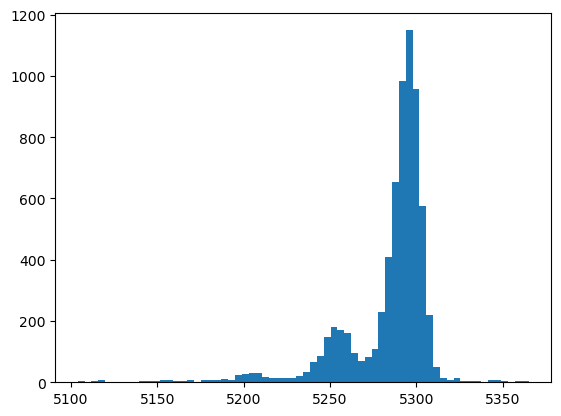

In [5]:
nbins = int(np.ceil(1 + np.log(len(signal)/np.log(2)))) *6

bin_content, bin_edges, _ = plt.hist(signal, bins = nbins)


N_events = sum(bin_content)

costf = ExtendedBinnedNLL(bin_content, bin_edges, model)

my_minuit = Minuit(costf, N1 = N1_ext, N2 = N2_ext, N3=N3_ext,  mu1 = 5300, sigma1 = 10, mu2= 5250, sigma2= 10, mu3=5200, sigma3=10)
my_minuit.migrad()

ch1 = my_minuit.values['mu1']
err_ch1 = my_minuit.errors['mu1']
fwhm1 = 2.355 * my_minuit.values['sigma1']
err_fwhm1 = 2.355 * my_minuit.errors['sigma1']
frac1 = fwhm1 / ch1
err_frac1 = frac1 * (err_ch1/ch1 + err_fwhm1/fwhm1)

ch2 = my_minuit.values['mu2']
err_ch2 = my_minuit.errors['mu2']
fwhm2 = 2.355 * my_minuit.values['sigma2']
err_fwhm2 = 2.355 * my_minuit.errors['sigma2']
frac2 = fwhm2 / ch2
err_frac2 = frac2 * (err_ch2/ch2 + err_fwhm2/fwhm2)

ch3 = my_minuit.values['mu3']
err_ch3 = my_minuit.errors['mu3']
fwhm3 = 2.355 * my_minuit.values['sigma3']
err_fwhm3 = 2.355 * my_minuit.errors['sigma3']
frac3 = fwhm3 / ch3
err_frac3 = frac3 * (err_ch3/ch3 + err_fwhm3/fwhm3)


print("chi2: " + str(my_minuit.fval/my_minuit.ndof))

print("\n \n channel1: " + str(ch1)  + " +/- " + str(err_ch1))
print("\n fwhm1: " + str(fwhm1) + " +/- " + str(err_fwhm1))
print("\n fwhm1/channel1 (1e-3): " + str(frac1 * 10**3) + " +/- " + str(err_frac1 * 10**3))

print("\n \n channel2: " + str(ch2)  + " +/- " + str(err_ch2))
print("\n fwhm2: " + str(fwhm2) + " +/- " + str(err_fwhm2))
print("\n fwhm2/channel2 (1e-3): " + str(frac2 * 10**3) + " +/- " + str(err_frac2 * 10**3))

print("\n \n channel3: " + str(ch3)  + " +/- " + str(err_ch3))
print("\n fwhm3: " + str(fwhm3) + " +/- " + str(err_fwhm3))
print("\n fwhm3/channel3 (1e-3): " + str(frac3 * 10**3) + " +/- " + str(err_frac3 * 10**3))

#display(my_minuit)